In [60]:
#Importing necessary libraries:
import pandas as pd ## Pandas for data manipulation
import matplotlib.pyplot as plt ## Matplotlib for plotting
from scipy import stats ## Scipy for scientific and technical computing
from sklearn.feature_selection import VarianceThreshold ## For feature selection based on variance
from sklearn.preprocessing import MinMaxScaler ## For feature scaling
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
df = pd.read_csv('cardio_train.csv')

In [ ]:
#importing the cleaned dataset
df1 = pd.read_csv('cleaned_cardio_train.csv')
df1 = df.drop('id', axis=1)
print(df1.head())

## 1- Problem

We aim to tackle the pervasive issue of cardiovascular diseases (CVDs), which remain the primary cause of global mortality. Addressing this problem is vital due to its significant impact on health, economy, and quality of life. By emphasizing preventive measures, promoting healthier lifestyles, and enhancing healthcare access and research, we can alleviate the burden of CVDs and improve overall well-being worldwide.



##  2- Data Mining Task 

**Classification Task:**
- **Problem Statement:** Predict the presence or absence of cardiovascular disease based on medical examinations and health parameters.
- **Class Attribute:** Presence or absence of cardiovascular disease (binary classification).
- **Features:** Parameters such as diastolic and systolic blood pressure, height, weight, etc.
- **Goal:** Accurately classify patients into two categories: those with cardiovascular disease and those without.

**Clustering Task:**
- **Problem Statement:** Identify inherent patterns in patient data and group individuals with similar health characteristics into clusters.
- **Features:** Same as in the classification task (e.g., blood pressure, height, weight).
- **Goal:** Partition the patient dataset into clusters where individuals within each cluster share similar health characteristics, facilitating understanding of patient subgroups and revealing underlying patterns in the data.

### Goals of Data Mining Tasks:

**Classification Task Goal:**
- **Objective:** Accurately predict whether a patient has cardiovascular disease, enabling early detection and timely intervention.

**Clustering Task Goal:**
- **Objective:** Uncover hidden structures and patterns within patient data, facilitating better understanding of patient subgroups and potentially revealing insights for personalized treatment strategies.


## 3-Data
### Dataset Information
|                |                                          |
|----------------|------------------------------------------|
| **Class Label**| cardio                                   |
| **Number of Rows** | 500                                    |
| **Number of Columns** | 13                                  |

### Dataset Source
This dataset is owned by Svetlana Ulianova. All of the dataset values were collected at the moment of medical examination.
There are 3 types of input features:
- **Objective**: factual information;
- **Examination**: results of medical examination;
- **Subjective**: information given by the patient.

The dataset used in this analysis is sourced from Kaggle. It is available at the following Kaggle dataset page:
[Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

### Columns
| Column          | Description                                        |
|-----------------|----------------------------------------------------|
| id              | Patient ID                                         |
| age             | Age of the patient (in days) (3650-29200)          |
| gender          | Gender of the patient (1: female, 2: male)        |
| height          | Height of the patient (in cm) (75-200)             |
| weight          | Weight of the patient (in kg) (15-200)             |
| ap_hi           | Systolic blood pressure (80-190)                   |
| ap_lo           | Diastolic blood pressure (30-1100)                 |
| cholesterol     | Cholesterol level (1: normal, 2: above normal, 3: well above normal) |
| gluc            | Glucose level (1: normal, 2: above normal, 3: well above normal) |
| smoke           | Smoking status (0: non-smoker, 1: smoker)          |
| alco            | Alcohol consumption status (0: non-drinker, 1: drinker) |
| active          | Physical activity level (0: inactive, 1: active)   |
| cardio          | Presence of cardiovascular disease (0: no, 1: yes) |



##### Checking for missing values in our dataset:



##### Note: If all counts are zero, it means there are no missing values in the dataset.

In this case, it seems we don't have any missing values.


In [44]:
# Checking for missing values in our dataset:
missing_values = df.isna().sum()

# Displaying the count of missing values for each column
print("Missing values")
print(missing_values)

Missing values
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [45]:
def detect_outliers(df):
    outliers_count = {}
    for column in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = 1.5 * IQR
        
        # Determine outliers
        outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)]
        
        # Count outliers
        outliers_count[column] = len(outliers)
        
    return outliers_count


outliers_in_columns = detect_outliers(df)



### Outliers

| Column  | Number of Outliers |
|---------|--------------------|
| age     | 0                  |
| height  | 1                  |
| weight  | 9                  |
| ap_hi   | 10                 |
| ap_lo   | 34                 |



##### Age, Height, Weight, ap_hi, and ap_lo Statistics

| Statistic | Age         | Height      | Weight      | ap_hi       | ap_lo       |
|-----------|-------------|-------------|-------------|-------------|-------------|
| Min       | 14321       | 76          | 41.0        | 80          | 30          |
| 25%       | 18044.0     | 158.0       | 64.0        | 120.0       | 80.0        |
| 50%       | 19715.0     | 164.0       | 72.0        | 120.0       | 80.0        |
| 75%       | 21703.0     | 170.0       | 84.0        | 140.0       | 90.0        |
| Max       | 23661       | 188         | 200.0       | 190         | 1100        |




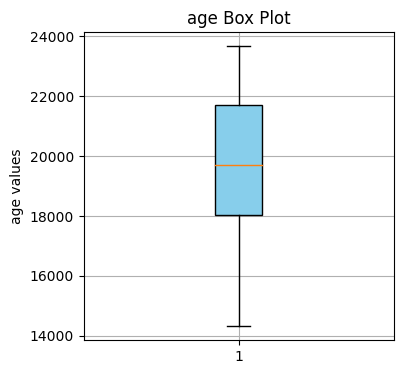

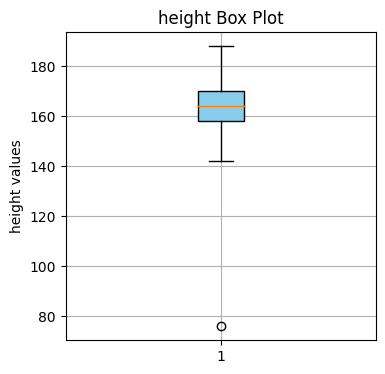

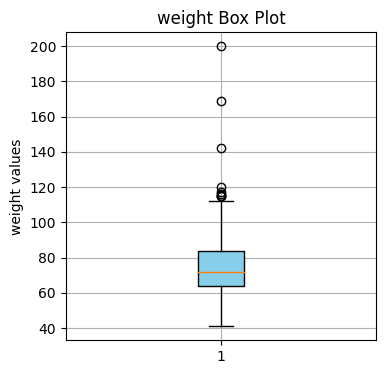

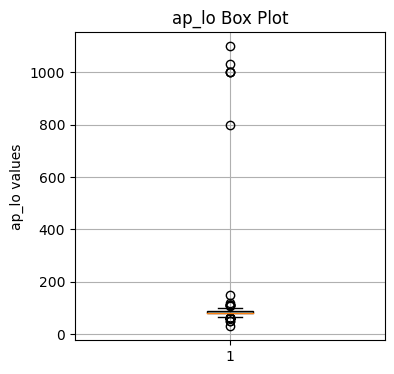

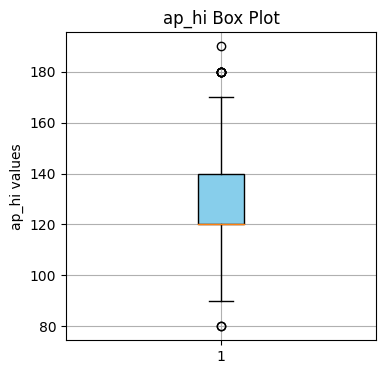

In [46]:


columns_to_plot = ['age', 'height', 'weight', 'ap_lo', 'ap_hi']

for column in columns_to_plot:
    # Create a figure with specified size
    plt.figure(figsize=(4, 4))
  
    # Create a boxplot with custom styling
    plt.boxplot(df[column], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
  
    # Set plot title and labels
    plt.title(f'{column} Box Plot')
    plt.ylabel(f'{column} values')
     
    # Add gridlines for better visualization
    plt.grid(True)
  
    # Display the boxplot  
    plt.show()


| Attribute  | Description                                                                                                                                   |
|------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| Age        | There are no outliers in the age attribute, but the wide range of ages could lead to calculation conflicts. Transformation may be needed to normalize the age distribution and bring it within a smaller, more common range. |
| Height     | One outlier is observed, indicating a significantly small measure of height. Smoothing this outlier will help improve the accuracy of the height data.                                                         |
| Weight     | Numerous outliers are present in the weight attribute, indicating potential noise in the data. Smoothing these outliers during preprocessing will help remove noise and improve data quality.                      |
| ap_hi      | Values in the dataset show a narrow range for systolic blood pressure (ap_hi). Some outliers are identified, necessitating preprocessing to handle them effectively.                                     |
| ap_lo      | Values for diastolic blood pressure (ap_lo) are closely clustered. However, there are numerous outliers that need to be addressed during preprocessing to ensure data integrity.                              |


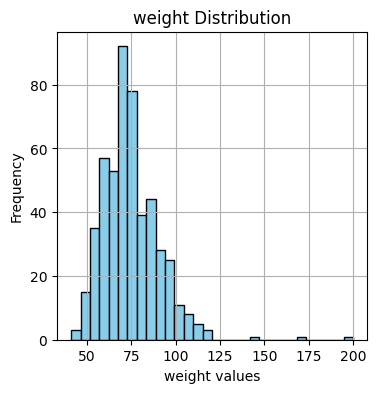

In [47]:


for column in df.columns:
    if column == 'weight':
        # Create a figure with specified size 
        plt.figure(figsize=(4, 4))
      
        # Create a histogram with specified bins, color, and edgecolor
        plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
      
        # Set plot title and labels 
        plt.title(f'{column} Distribution')
        plt.xlabel(f'{column} values')
        plt.ylabel('Frequency')

        # Add gridlines for better visualization
        plt.grid(True)
      
        # Display the histogram 
        plt.show()


| Attribute  | Description                                                                                                                                   |
|------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| Weight     | After observation, we noticed that the majority of values lie within the normal weight range, approximately from 55 to 80. However, there are also numerous outliers present in the dataset, indicating potential inconsistencies or noise in the data. |


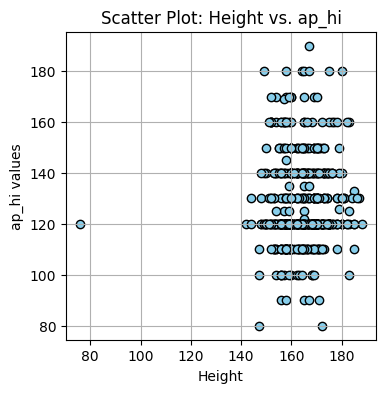

In [48]:
# Set the size of the figure
plt.figure(figsize=(4, 4))

# Create a scatter plot between 'height' and 'ap_hi'
plt.scatter(df['height'], df['ap_hi'], color='skyblue', edgecolor='black')

# Set the title of the plot
plt.title('Scatter Plot: Height vs. ap_hi')

# Label the x-axis
plt.xlabel('Height')

# Label the y-axis
plt.ylabel('ap_hi values')

# Add gridlines for better visualization
plt.grid(True)

# Display the scatter plot
plt.show()

| Attribute  | Description                                                                                                                                   |
|------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| scatterplot     | This scatterplot helps us determine whether height and ap_hi are correlated. It indicates that the two attributes are not correlated and do not exhibit a proportional relationship.  |


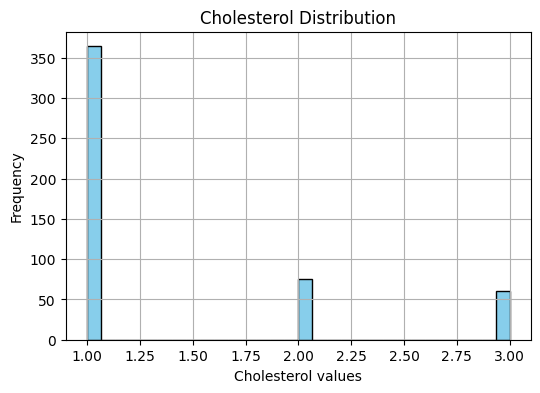

In [49]:


# Filter the DataFrame to include only the 'cholesterol' column
cholesterol_column = df['cholesterol']

# Create a figure with specified size 
plt.figure(figsize=(6, 4))

# Create a histogram with specified bins, color, and edgecolor
plt.hist(cholesterol_column, bins=30, color='skyblue', edgecolor='black')

# Set plot title and labels 
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol values')
plt.ylabel('Frequency')

# Add gridlines for better visualization
plt.grid(True)

# Display the histogram 
plt.show()


| Attribute  | Description                                                                                                                                   |
|------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| Bar plot     | The Bar plot represents the total Cholesterol measures in the cardio dataset. It indicates that most of the patients have a normal measure of cholesterol, which reflects on their health maintenance. It leads us to take into consideration the possibility of having disease for patients having above normal and well above normal later. |

## 4- Data Preprocessing 

Data preprocessing is vital to make sure our data is good enough for analysis and modeling. It involves important tasks like handling missing values, finding and removing weird data points, making sure all the data is in a similar scale, creating new useful features, fixing any problems with how the data is distributed, making the data simpler but still useful, and fixing any mistakes in the data. Doing all these things is really important because it makes the models we build with the data more reliable. This helps us make better predictions and understand things like heart disease more accurately. We chose to do data preprocessing to make sure the models we use are based on good data, which makes them better at predicting and understanding heart health.




#### Identifying and Removing Outliers

| Step               | Purpose                                                                                                                                                                   | How                                                                                                                                                                                                                                                                                                  | Attributes                                                                                                                                                                                                                                  |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Select Numerical Features | Focus on numerical features susceptible to outliers (e.g., age, height, weight, blood pressure).                                                                          | Identify continuous features likely to contain outliers such as age, height, weight, and blood pressure.                                                                                                                                                                                          | In a dataset containing information about individuals, select numerical features like age, height, weight, and blood pressure for outlier detection.                                                                                   |
| Compute Z-Score    | Calculate the z-score for each data point in selected numerical features.                                                                                                  | Compute the z-score using formula                                                                                                                        | For each selected numerical feature (e.g., age, height, weight), compute the z-score for every data point.                                                                                                                                  |
| Identify Outliers  | Identify data points with high absolute z-scores as potential outliers.                                                                                                    | Set a threshold for the absolute z-score,Identify data points with z-scores exceeding this threshold.                                                                                                                                                   | Identify data points in each numerical feature where the absolute z-score exceeds the chosen threshold.                                                                                                                                    |
| Remove Outliers    | Remove identified outliers from the dataset.                                                                                                                                 | Exclude outlier data points entirely or apply data transformation techniques like winsorization or log transformation.                                                                                                                                                                                 | Exclude identified outlier data points from the dataset or apply transformation techniques to adjust their values.                                                                                                                          |
| Verify Results     | Verify the impact of outlier removal on dataset distribution and statistics.                                                                                               | Compare dataset's distribution and statistics before and after outlier removal. Utilize visualizations and statistical tests for verification.                                                                                                                                                      | Analyze distribution and statistics of each numerical feature before and after outlier removal to verify effectiveness.                                                                                                                   |



### Data before removing the outliers:

In [50]:
# Calculate Z-scores for each column in the DataFrame
z_scores = stats.zscore(df)

# Set the threshold for identifying outliers
threshold = 3

# Identify rows with outliers based on Z-scores
outliers = (abs(z_scores) > threshold).any(axis=1)

# Extract rows with outliers from the original DataFrame
outliers_df = df[outliers]

# Print rows containing outliers

print(df)

      id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0  18393       2     168    62.0    110     80            1     1   
1      1  20228       1     156    85.0    140     90            3     1   
2      2  18857       1     165    64.0    130     70            3     1   
3      3  17623       2     169    82.0    150    100            1     1   
4      4  17474       1     156    56.0    100     60            1     1   
..   ...    ...     ...     ...     ...    ...    ...          ...   ...   
494  708  22464       1     161    62.0    140     80            2     2   
495  711  21791       1     150    88.0    120     80            1     1   
496  712  17381       1     151   117.0    160     90            2     1   
497  713  20449       1     151    53.0    120     80            1     1   
498  714  21197       1     162    60.0    120     80            1     1   

     smoke  alco  active  cardio  
0        0     0       1       0  
1        0     0 

In [51]:
# Define the columns to check for outliers
columns_to_check = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create a copy of the original DataFrame
df_cleaned = df.copy()

# Iterate over each column to remove outliers
for column in columns_to_check:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers for this column
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Save cleaned DataFrame to a CSV file
df_cleaned.to_csv('cleaned_cardio_train.csv', index=False)

### Data after removing the outliers:

In [52]:
df_clean = pd.read_csv('cleaned_cardio_train.csv')

# Print rows containing outliers

print(df_cleaned)

      id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0  18393       2     168    62.0    110     80            1     1   
1      1  20228       1     156    85.0    140     90            3     1   
2      2  18857       1     165    64.0    130     70            3     1   
3      3  17623       2     169    82.0    150    100            1     1   
5      8  21914       1     151    67.0    120     80            2     2   
..   ...    ...     ...     ...     ...    ...    ...          ...   ...   
493  706  20571       1     159    68.0    120     80            1     1   
494  708  22464       1     161    62.0    140     80            2     2   
495  711  21791       1     150    88.0    120     80            1     1   
497  713  20449       1     151    53.0    120     80            1     1   
498  714  21197       1     162    60.0    120     80            1     1   

     smoke  alco  active  cardio  
0        0     0       1       0  
1        0     0 

### Discretizing Age into Intervals
| Step                   | Why                                                                                                                                                                                              | How                                                                                           | On which attributes                                                                                                                                                                     |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Define the Bins        | By discretizing age into intervals, we can capture variations in behavior or patterns across different age groups. This helps in segmenting the population based on age, which can be useful for targeted analysis or modeling.     | We define age intervals based on meaningful divisions that reflect distinct life stages or demographic characteristics.                                    | Age attribute                                                                                                                                                                            |
| Define the Labels      | Labels provide human-readable representations of the age intervals, making it easier to interpret and communicate the results of the analysis.                                                     | We assign labels to each bin to denote the corresponding age intervals.                      | Defined age intervals                                                                                                                                                                    |
| Discretize Age Values | Discretizing age values allows us to transform continuous numerical data into categorical data, which can be more interpretable and easier to analyze in certain contexts. It also enables us to capture nonlinear relationships between age and other variables. | We apply the defined bins and labels to discretize the 'age' feature in our dataset.        | Age attribute                                                                                                                                                                            |


### Data before the discretization:

In [53]:
print(df)

      id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0  18393       2     168    62.0    110     80            1     1   
1      1  20228       1     156    85.0    140     90            3     1   
2      2  18857       1     165    64.0    130     70            3     1   
3      3  17623       2     169    82.0    150    100            1     1   
4      4  17474       1     156    56.0    100     60            1     1   
..   ...    ...     ...     ...     ...    ...    ...          ...   ...   
494  708  22464       1     161    62.0    140     80            2     2   
495  711  21791       1     150    88.0    120     80            1     1   
496  712  17381       1     151   117.0    160     90            2     1   
497  713  20449       1     151    53.0    120     80            1     1   
498  714  21197       1     162    60.0    120     80            1     1   

     smoke  alco  active  cardio  
0        0     0       1       0  
1        0     0 

In [54]:
# Function to convert age from days to years
def convert_days_to_years(age_in_days):
    return int(age_in_days / 365.25)

# Convert ages from days to years in the 'age' column
df_clean['age'] = df_clean['age'].apply(convert_days_to_years)

# Rename the 'age' column to 'age_in_years'
df_clean = df_clean.rename(columns={'age_in_years': 'age_in_years'})

# Print the first few rows of the dataframe with the converted ages
print(df_clean)

      id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      0   50       2     168    62.0    110     80            1     1      0   
1      1   55       1     156    85.0    140     90            3     1      0   
2      2   51       1     165    64.0    130     70            3     1      0   
3      3   48       2     169    82.0    150    100            1     1      0   
4      8   59       1     151    67.0    120     80            2     2      0   
..   ...  ...     ...     ...     ...    ...    ...          ...   ...    ...   
442  706   56       1     159    68.0    120     80            1     1      0   
443  708   61       1     161    62.0    140     80            2     2      0   
444  711   59       1     150    88.0    120     80            1     1      0   
445  713   55       1     151    53.0    120     80            1     1      0   
446  714   58       1     162    60.0    120     80            1     1      0   

     alco  active  cardio  

### Data after the discretization:

In [55]:
# Define the bins
bins = [35, 45, 55, 65]

# Define the labels for the bins
labels = ['(35,45]', '(45,55]', '(55,65]']

# Discretize the age values into intervals
df_clean['age_intervals'] = pd.cut(df_clean['age'], bins=bins, labels=labels)

print(df_clean)

      id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      0   50       2     168    62.0    110     80            1     1      0   
1      1   55       1     156    85.0    140     90            3     1      0   
2      2   51       1     165    64.0    130     70            3     1      0   
3      3   48       2     169    82.0    150    100            1     1      0   
4      8   59       1     151    67.0    120     80            2     2      0   
..   ...  ...     ...     ...     ...    ...    ...          ...   ...    ...   
442  706   56       1     159    68.0    120     80            1     1      0   
443  708   61       1     161    62.0    140     80            2     2      0   
444  711   59       1     150    88.0    120     80            1     1      0   
445  713   55       1     151    53.0    120     80            1     1      0   
446  714   58       1     162    60.0    120     80            1     1      0   

     alco  active  cardio a

### Normalizing Selected Columns with Min-Max Scaling
| Step                   | Why                                                                                                                                                                                              | How                                                                                           | On which attributes                                                                                                                                                                     |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Define Columns to Normalize | Certain numerical features in a dataset may have different scales and magnitudes. Normalization ensures that these features are on a similar scale, preventing features with larger magnitudes from dominating the model training process. This is particularly important for algorithms sensitive to feature scales, such as gradient descent-based algorithms. | We select the columns in the dataset that contain numerical features needing normalization. These columns are typically those with varying scales and magnitudes, such as 'age', 'income', or 'number of children'. | Numerical columns needing normalization                                                                                                                                               |
| Extract Data to Normalize | We need to isolate the data within the selected columns to perform normalization specifically on these features. | We extract the data from the selected columns in the dataset, creating a subset of data that will undergo Min-Max Scaling. | Subset of data containing values from selected columns                                                                                                                                 |
| Initialize MinMaxScaler | Min-Max Scaling is a popular method for normalization as it preserves the shape of the original distribution while scaling the values to a specified range, typically between 0 and 1. | We instantiate an instance of the MinMaxScaler from a suitable library (e.g., scikit-learn in Python). This scaler will be used to transform the data into the desired range. | Instance of MinMaxScaler                                                                                                                                                               |
| Fit and Transform Data | This step involves fitting the scaler to the data and transforming it using Min-Max Scaling to ensure that the features are within the desired range. | We apply the MinMaxScaler to the extracted data from the selected columns, scaling the values to a specified range. This transformation ensures that all features are uniformly scaled. | Extracted data from selected columns                                                                                                                                                   |
| Update the Original DataFrame | After normalization, we need to replace the original values in the selected columns with the scaled values. | We update the original dataset by replacing the values in the selected columns with the normalized values obtained after scaling. | Original dataset with normalized values in selected columns                                                                                                                            |
| Print Scaled Data | Printing the scaled data allows us to observe the effects of Min-Max Scaling and verify that the normalization process has been applied correctly. | We display the dataset with the normalized values to visually inspect the changes and ensure that the scaling has been performed as expected. | Dataset with normalized values for inspection and verification                                                                                                                        |


### Data before the normalization:

In [56]:
print(df)

      id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0  18393       2     168    62.0    110     80            1     1   
1      1  20228       1     156    85.0    140     90            3     1   
2      2  18857       1     165    64.0    130     70            3     1   
3      3  17623       2     169    82.0    150    100            1     1   
4      4  17474       1     156    56.0    100     60            1     1   
..   ...    ...     ...     ...     ...    ...    ...          ...   ...   
494  708  22464       1     161    62.0    140     80            2     2   
495  711  21791       1     150    88.0    120     80            1     1   
496  712  17381       1     151   117.0    160     90            2     1   
497  713  20449       1     151    53.0    120     80            1     1   
498  714  21197       1     162    60.0    120     80            1     1   

     smoke  alco  active  cardio  
0        0     0       1       0  
1        0     0 

### Data after the normalization:

In [57]:
# Define columns to normalize
columns_to_normalize = ['age','height','weight','ap_hi','ap_lo','cholesterol','gluc']

# Extract the data to be normalized
data_to_normalize = df_clean[columns_to_normalize]

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the data using Min-Max Scaling
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# Update the original DataFrame with the normalized values
df_clean[columns_to_normalize] = normalized_data_minmax

# Print the Min-Max scaled data

print(df_clean)

      id   age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0      0  0.44       2  0.565217  0.264706  0.142857  0.428571          0.0   
1      1  0.64       1  0.304348  0.602941  0.571429  0.714286          1.0   
2      2  0.48       1  0.500000  0.294118  0.428571  0.142857          1.0   
3      3  0.36       2  0.586957  0.558824  0.714286  1.000000          0.0   
4      8  0.80       1  0.195652  0.338235  0.285714  0.428571          0.5   
..   ...   ...     ...       ...       ...       ...       ...          ...   
442  706  0.68       1  0.369565  0.352941  0.285714  0.428571          0.0   
443  708  0.88       1  0.413043  0.264706  0.571429  0.428571          0.5   
444  711  0.80       1  0.173913  0.647059  0.285714  0.428571          0.0   
445  713  0.64       1  0.195652  0.132353  0.285714  0.428571          0.0   
446  714  0.76       1  0.434783  0.235294  0.285714  0.428571          0.0   

     gluc  smoke  alco  active  cardio age_interval

### The final preprocessed dataset contains 447 rows and 13 columns.

In [58]:
print(df_clean)

      id   age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0      0  0.44       2  0.565217  0.264706  0.142857  0.428571          0.0   
1      1  0.64       1  0.304348  0.602941  0.571429  0.714286          1.0   
2      2  0.48       1  0.500000  0.294118  0.428571  0.142857          1.0   
3      3  0.36       2  0.586957  0.558824  0.714286  1.000000          0.0   
4      8  0.80       1  0.195652  0.338235  0.285714  0.428571          0.5   
..   ...   ...     ...       ...       ...       ...       ...          ...   
442  706  0.68       1  0.369565  0.352941  0.285714  0.428571          0.0   
443  708  0.88       1  0.413043  0.264706  0.571429  0.428571          0.5   
444  711  0.80       1  0.173913  0.647059  0.285714  0.428571          0.0   
445  713  0.64       1  0.195652  0.132353  0.285714  0.428571          0.0   
446  714  0.76       1  0.434783  0.235294  0.285714  0.428571          0.0   

     gluc  smoke  alco  active  cardio age_interval

## 5-Data Mining Techniques

##### We applied both supervised and unsupervised learning to our data using classification and clustering techniques.

**For classification** using a Decision Tree classifier. This method is a part of supervised learning in machine learning where the goal is to predict a categorical target variable based on one or more features.

We used a method called a decision tree to figure out if someone has heart problems or not. This method works like a tree where each step leads to a decision. We predicted whether someone has heart problems based on things like their age, gender, weight, and other health info. We split our data into two parts:

- **Training data:** Used to build our decision tree.
- **Testing data:** Used to see if our decision tree works well.

After testing, we checked how accurate our predictions were using a chart called a confusion matrix.


| Python Packages and Methods Used | Description |
|----------------------------------|-------------|
| Pandas                           | For data manipulation and ingestion (pandas.read_csv to load data, and DataFrame operations for handling data). |
| Scikit-learn                     | This library is central to modeling and evaluation: <br> - Model Creation: DecisionTreeClassifier from sklearn.tree is used to create the classification model. <br> - Data Splitting: train_test_split from sklearn.model_selection is used to split the dataset into training and testing sets to validate the model's performance on unseen data. <br> - Model Training: The fit method on the DecisionTreeClassifier instance is used to train the model using the training data. <br> - Prediction: The predict method is used for making predictions on the test dataset. <br> - Evaluation: Various metrics such as accuracy_score and confusion_matrix from sklearn.metrics assess the model's performance. The accuracy score provides a quick indication of overall performance, while the confusion matrix offers detailed insight into how well the classifier is identifying each class. |
| Matplotlib                       | Used for plotting, specifically pyplot for generating plots like the visualization of the Decision Tree. |

#### Implementation Steps:
1. **Data Preparation:** Load and prepare the data using pandas, define target variables and predictors.
2. **Model Initialization:** Initialize the Decision Tree classifier with any specific parameters if needed (like max_depth, min_samples_split, etc.).
3. **Model Training:** Fit the model to the training data.
4. **Performance Evaluation:** Evaluate the model using the testing set through metrics like accuracy and visualize results with the confusion matrix.
5. **Visualization of the Model:** Use tree.plot_tree from sklearn.tree to visualize how the Decision Tree makes decisions, which can also help in tuning the model by understanding overfitting or underfitting patterns.


**For Clustering** is an unsupervised learning task, it doesn't rely on class labels to group data points. Therefore, we can exclude the class label attribute "cardio" from our dataset when performing clustering analysis.


Clustering helps sort patients into groups based on their health data. This helps doctors treat patients better, allocate resources wisely, and prevent diseases. It also helps researchers find new insights in the data. So, clustering improves healthcare by making it more personalized and efficient. We applied clustering to our patient data to better understand patient populations, tailor treatments, allocate resources efficiently, prevent diseases, and uncover new insights in healthcare data.


##### Python Packages:

| Package       | Description                                           |
|---------------|-------------------------------------------------------|
| pandas        | For data manipulation and preprocessing.              |
| numpy         | For numerical operations and array manipulation.      |
| matplotlib    | For creating basic plots and visualizations.          |
| seaborn       | For enhancing the visual appeal of matplotlib plots.  |
| scikit-learn  | For implementing KMeans clustering, feature scaling,  |
|               | and evaluation metrics like silhouette score.         |


#### Implementation Steps:

##### KMeans Clustering:
- We will Use KMeans method to group patients into clusters. We will try different cluster numbers and see how well they fit the data. We'll check how close points are to their cluster center and how separated clusters are.

##### Evaluate Optimal K:
- Find the best number of clusters by balancing how close points are within clusters (WCSS) and how well-separated clusters are (silhouette score). We'll visualize this to make it easier to choose.

##### Final Clustering:
- Once we know the best number of clusters, we'll use KMeans to group patients accordingly. This will give us distinct groups based on their shared features.



## 6-Evaluation and Comparison

In [ ]:
#feature selection

fn = df.keys().tolist() [:-1] 
X = df[fn] 
y = df['cardio']

In [ ]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_entropy = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf_gini.fit(X_train,y_train)
clf_entropy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_gini))

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_entropy))

In [ ]:
#compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)

cn = df['cardio'].unique() #classes names

#create a confusion matrix display object
disp_gini = ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test, display_labels=cn)

In [ ]:
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)
disp_entropy = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)

In [ ]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi=500)
tree.plot_tree(clf_gini, feature_names = fn, class_names = cn.astype(str), filled = True, fontsize=5, max_depth=5);

# You can save your plot if you want
fig.savefig('cardio_DT_gini3.png')

In [ ]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi=500)
tree.plot_tree(clf_entropy, feature_names = fn, class_names = cn.astype(str), filled = True, fontsize=5, max_depth=5);

# You can save your plot if you want
fig.savefig('cardio_DT_entropy3.png')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_entropy = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf_gini.fit(X_train,y_train)
clf_entropy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_gini))

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_entropy))

In [ ]:
#compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)

cn = df['cardio'].unique() #classes names

#create a confusion matrix display object
disp_gini = ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test, display_labels=cn)


In [ ]:
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)
disp_entropy = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)

In [ ]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi=500)
tree.plot_tree(clf_gini, feature_names = fn, class_names = cn.astype(str), filled = True, fontsize=5, max_depth=5);

# You can save your plot if you want
fig.savefig('cardio_DT_gini1.png')

In [ ]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi=500)
tree.plot_tree(clf_entropy, feature_names = fn, class_names = cn.astype(str), filled = True, fontsize=5, max_depth=5);

# You can save your plot if you want
fig.savefig('cardio_DT_entropy1.png')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_entropy = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf_gini.fit(X_train,y_train)
clf_entropy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_gini))

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_entropy))

In [ ]:
#compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)

cn = df['cardio'].unique() #classes names

#create a confusion matrix display object
disp_gini = ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test, display_labels=cn)

In [ ]:
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)
disp_entropy = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)

In [ ]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi=500)
tree.plot_tree(clf_gini, feature_names = fn, class_names = cn.astype(str), filled = True, fontsize=5, max_depth=5);

# You can save your plot if you want
fig.savefig('cardio_DT_gini2.png')

In [ ]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5), dpi=500)
tree.plot_tree(clf_entropy, feature_names = fn, class_names = cn.astype(str), filled = True, fontsize=5, max_depth=5);

# You can save your plot if you want
fig.savefig('cardio_DT_entropy2.png')

#### Classification Comparison Criteria 
#### We tried 3 different partions for dataset splitting to create the decision tree:

| Training Set Size | Testing Set Size | Accuracy (Gini) | Accuracy (Entropy) |
|-------------------|------------------|------------------|---------------------|
| 90%               | 10%              |   71%            |   66%               |
| 80%               | 20%              |   65%            |   68%               |
| 70%               | 30%              |   58%            |   62%               |



#### Clustring Comparison Criteria
#### We tried 3 different number of clusters: K=3, K=4, K=5


| Number of Clusters (K) | Average Silhouette Width | Total Within-Cluster Sum of Squares (WCSS) |
|-------------------------|--------------------------|---------------------------------------------|
| K=3                     | 0.594                    | 340,956,486                                 |
| K=4                     | 0.564                    | 201,977,400                                 |
| K=5                     | 0.563                    | 133,003,663                                 |

Based on the majority rule, the optimal number of clusters appears to be K=3, as it has the highest average silhouette width and a reasonably high total within-cluster sum of squares.

Here are the visualizations for each trial:



In [73]:
# Importing the dataset
dataset = pd.read_csv('cleaned_cardio_train.csv')

# Extract the features (excluding the target variable 'cardio')
features = dataset.drop(columns=['cardio'])

# Selecting relevant features for clustering
X = dataset[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


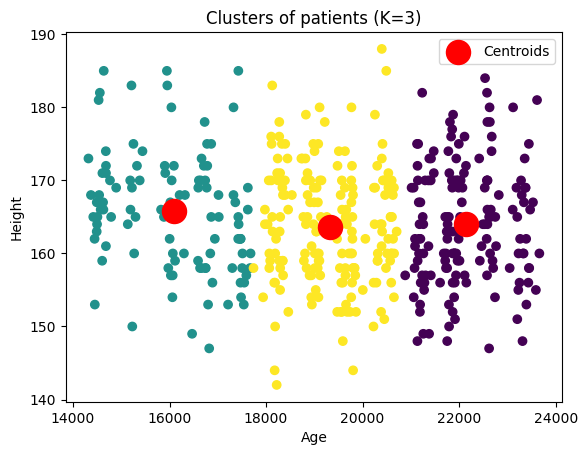

In [74]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the value of K
k = 3

# Initialize KMeans with the specified value of K
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'Clusters of patients (K={k})')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()


- Visualization for K=3:

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


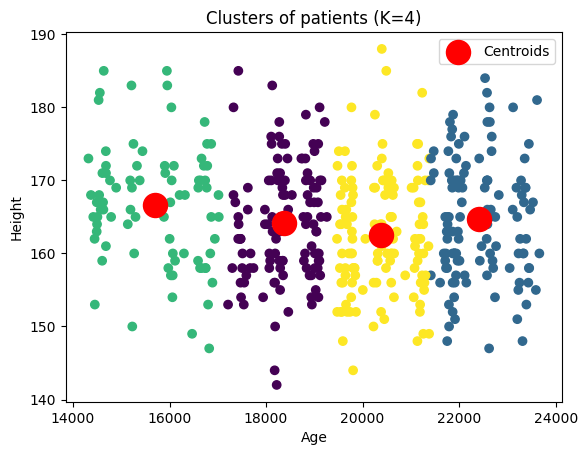

In [75]:
# Set the value of K
k = 4

# Initialize KMeans with the specified value of K
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'Clusters of patients (K={k})')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

- Visualization for K=4:

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


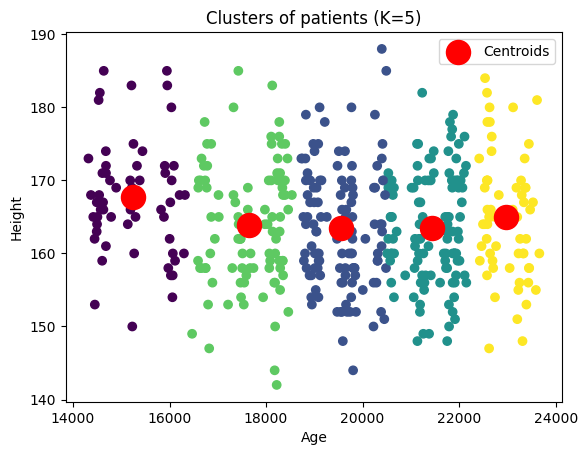

In [76]:
# Set the value of K
k = 5

# Initialize KMeans with the specified value of K
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'Clusters of patients (K={k})')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

- Visualization for K=5:

These visualizations depict the colored groups representing the clusters of patients based on their characteristics.

## 7- Findings

Initially, we chose a dataset containing patient information to predict the likelihood of cardiovascular disease, aiming to provide individuals with tailored preventive measures for improving their overall well-being.

To ensure accurate results, we used different methods to clean up our data, like removing empty values and extreme outliers. We also adjusted some data to make it easier to work with. By plotting graphs and analyzing them, we could see where improvements were needed and make the necessary changes.

As a result, we utilized data mining techniques, including classification and clustering. In the classification task, we employed the decision tree method to build our model. We experimented with three different partions of training and testing data to optimize construction and evaluation, yielding the following outcomes:

###### For Classification,
###### We tried 3 different partions for dataset splitting to create the decision tree:

| Training Set Size | Testing Set Size | Accuracy (Gini) | Accuracy (Entropy) |
|-------------------|------------------|------------------|---------------------|
| 90%               | 10%              |   71%            |   66%               |
| 80%               | 20%              |   65%            |   68%               |
| 70%               | 30%              |   58%            |   62%               |

The first model with 90% training data and 10% test data is considerd an over-fit
The model that has the best accuracy was the second model with 80% training data and 20% test data
which means that most tuples were correctly classified.



From the plot of the tree, we concluded the following results:
- The root node shows the initial feature that provides the most significant split of the data(ap_hi).
  - The branches from each node lead to either further decision nodes (where additional splits are made) or to leaf nodes, which represent the final decision outcomes (classes).
- Each node displays several pieces of information:
       - A condition or feature used to split the data (e.g., cholesterol < 1.5).
       - A 'gini or entropy' value, which indicates the purity of the node. A lower Gini index suggests a better separation of the classes at that node and an attribute with high IG suggests a better separation of the classes at that node
       - The 'samples' number, indicating how many instances of the dataset fall into that node.
       - A 'value' list, showing the distribution of classes among those samples.
       - The predominant class in that node is also indicated.

The final decisions (classes) are represented by the colors in the leaf nodes, which typically vary depending on the class proportions.

###### For Clustering, we used K-means algorithm with 3 different K to find the optimal number of clusters, we calculated the average silhouette width for each K, and we concluded the following results:

| Number of Clusters (K) | Average Silhouette Width | Total Within-Cluster Sum of Squares (WCSS) |
|-------------------------|--------------------------|---------------------------------------------|
| K=3                     | 0.594                    | 340,956,486                                 |
| K=4                     | 0.564                    | 201,977,400                                 |
| K=5                     | 0.563                    | 133,003,663                                 |


Based on the analysis of silhouette scores and within-cluster sum of squares (WCSS) for different values of K:

- The silhouette score, which measures the separation between clusters, is highest for K=3. This suggests that the clusters are relatively well-separated for this value of K.
- The within-cluster sum of squares (WCSS) decreases as K increases, but the rate of decrease slows down after K=3. This indicates that adding more clusters beyond K=3 does not significantly improve the compactness ofGiven these observations, it's evident that the dataset exhibits clear patterns of differentiation, particularly with the highest silhouette score observed for K=3. Therefore, it is reasonable to assert that partitioning the dataset into **3 clusters** is the most appropriate choice. This decision is supported by the significant separation between clusters and the diminishing returns in cluster compactness beyond K=3, as evidenced by the slowing rate of decrease in the within-cluster sum of squares (WCSS). Hence, **3 clusters** provide a robust and meaningful segmentation of the data, capturing distinct groups while avoiding unnecessary complexity.
oning the dataset.
ities.
ted features.

In [ ]:
# Plotting Silhouette Coefficient and Elbow Method for different K values
silhouette_scores = []
wcss_values = []
k_range = [3, 4, 5]  # Range of K values

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    wcss_values.append(kmeans.inertia_)

# Plot the Silhouette Coefficient
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Plot the Elbow Curve
plt.subplot(1, 2, 2)
plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Analysis Summary

Based on the results of the Silhouette Coefficient and the Elbow Method:

- The Silhouette Coefficient indicates that the clusters are relatively well-separated, with scores ranging from 0.56 to 0.59.
- The Elbow Method suggests that the optimal number of clusters could be around 3 or 4, as there is a significant decrease in the within-cluster sum of squares (WCSS) up to those points, after which the decrease becomes less pronounced.

#### Finally, both models are helpful for predicting whether a person can have Cardiovascular Disease,
#### Given that our dataset includes a class label "cardio," supervised learning models (classification) are better suited and more accurate than unsupervised learning models (clustering). This is because we already know the expected output in advance, leveraging the class label attribute.

## 8- References

 J. Han, J. Pei, and H. Tong, *Data Mining: Concepts and Techniques*, 4th ed. Morgan Kaufmann, 2022.


Kaggle. (n.d.). Retrieved from [https://www.kaggle.com](https://www.kaggle.com)


“Pandas Tutorial,” www.w3schools.com. https://www.w3schools.com/python/pandas/default.asp